# yeo-hon可视化

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [1]:
import matplotlib as mpl
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
# 设置全局字体大小为12

# 设置全局字体加粗
# plt.rcParams['font.weight'] = 'bold'
# 设置全局字体为SimSun和Times New Roman
plt.rcParams['font.family'] = ['SimHei','Times New Roman']
plt.rcParams['font.weight'] = 'bold'

# plt.rcParams['font.family']=['Times New Roman ,SimSun ']# 设置字体族，中文为SimSun，英文为Times New Roman
plt.rcParams['mathtext.fontset'] = 'stix' # 设置数学公式字体为stix
plt.rcParams['font.size'] = 16

In [2]:


from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    minmax_scale,
)
import pandas as pd

In [3]:
df=pd.read_csv("D:\Desktop\Iov-with-FL\data\Car_Hacking_5%.csv").sample(frac=1).reset_index(drop=True)
feature_names = ["DATA[0]", "DATA[1]", "DATA[2]", "DATA[3]", "DATA[4]", "DATA[5]", "DATA[6]","DATA[7]"]

In [4]:
# 用特定值填充0值，例如用平均值填充
# 选择DataFrame中的数值列
numeric_df = df.select_dtypes(include=[np.number])
# 计算数值列的平均值
mean_value = numeric_df.mean()
df.replace(0, mean_value, inplace=True)

In [5]:
df.describe()

,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7]
count,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000
mean,722.633435,77.504203,63.783632,62.453929,112.664012,72.891750,83.366758,41.419515,82.262487
std,368.731744,80.964239,42.605911,45.252983,81.593346,61.470154,64.640622,51.567651,64.068123
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,399.000000,20.000000,39.000000,40.415897,78.690225,41.000000,36.000000,26.254518,54.088396
50%,704.000000,58.136694,45.817090,40.415897,78.690225,51.373894,61.808144,26.254518,54.088396
75%,1072.000000,69.000000,69.000000,96.000000,137.000000,107.000000,127.000000,26.254518,109.000000
max,2047.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [6]:
X_full = df[feature_names].copy()
y_full = df["Label"].copy()
from imblearn.under_sampling import NearMiss
X_full,y_full = NearMiss().fit_resample(X_full, y_full)
X_full=X_full.head(818440)
y_full=y_full.head(818440)

In [7]:
X_full.describe()

,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7]
count,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000
mean,74.872717,85.788889,78.510212,155.165056,73.376823,70.413154,45.890955,110.544279
std,65.360442,58.638036,52.132826,93.138106,51.110368,48.153810,52.777666,87.302291
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.000000,41.000000,40.415897,78.690225,41.000000,36.000000,26.254518,54.088396
50%,64.000000,69.000000,40.415897,135.000000,51.373894,61.808144,26.254518,54.088396
75%,95.000000,127.000000,96.000000,255.000000,107.000000,61.808144,26.254518,191.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [8]:
feature_mapping={}
import re
for i in feature_names:
    feature_mapping[i]="数据段 "+re.findall(r'\d+', i)[0]
features = ["DATA[0]", "DATA[4]"]

In [9]:
distributions = [
    (
        "应用所提出方案进行转换后的数据",
#            minmax_scale( 
#                PowerTransformer(method="box-cox").fit_transform(X_full[features])
#                QuantileTransformer(output_distribution="uniform", random_state=42).fit_transform(X_full[features])
#                 RobustScaler(quantile_range=(25, 75)).fit_transform(X_full[features])
                MinMaxScaler().fit_transform(PowerTransformer(method="yeo-johnson").fit_transform(X_full[features]))
#             ),
    )
]

In [10]:
# 假设 y_full 是一个Pandas Series
# 创建一个字典，映射原始字符串到数字
replacement_dict = {
    'DoS': 0,
    'R': 1,
    'RPM': 2,
    'gear': 3,
    'Fuzzy': 4
}

# 使用 replace 方法进行替换
y_full.replace(replacement_dict, inplace=True)

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y_full)

In [11]:
pd.DataFrame(distributions[0][1]).describe()

,0,1
count,123120.000000,123120.000000
mean,0.457357,0.633822
std,0.288218,0.158646
min,0.000000,0.000000
25%,0.305656,0.547919
50%,0.498346,0.597293
75%,0.613228,0.770105
max,1.000000,1.000000


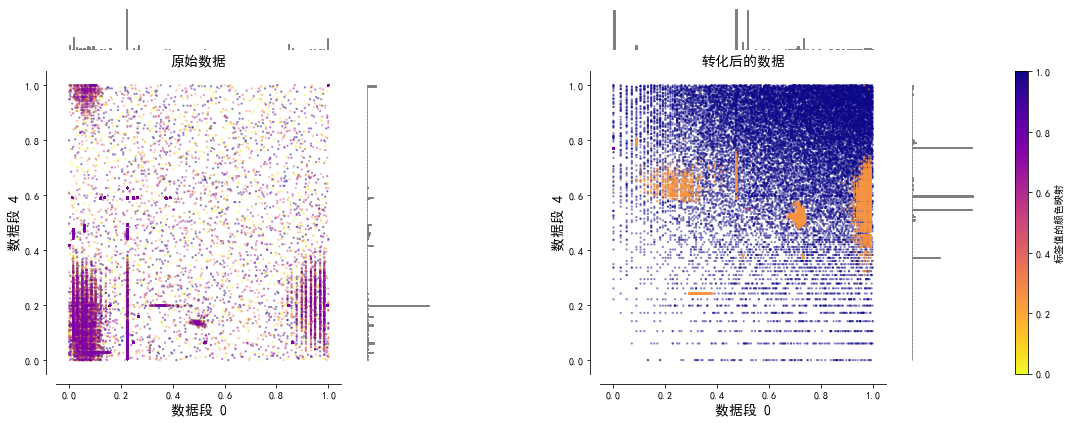

In [12]:
# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, "plasma_r", cm.hot_r)
plt.rcParams['figure.dpi'] = 500  # 可以根据您的需要调整DPI值

def create_axes(title, figsize=(18, 6)):
    fig = plt.figure(figsize=figsize)
#     fig.suptitle(title)

#     # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

     # define the axis for the first plot
#     left, width = 0.5, 0.22  # 减小左边距和宽度以使直方图更靠近
#     bottom, height = 0.1, 0.7
#     bottom_h = height + 0.15
#     left_h = left + width +0.02  # 减小间距以使直方图更靠近
    
    
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.1, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return (
        (ax_scatter, ax_histy, ax_histx),
        (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
        ax_colorbar,
    )

def plot_distribution(axes, X, y, hist_nbins=150, title="", x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)
    
        # Set larger font size for labels
    ax.set_title(title, fontsize=14)  # 增大标题字体
    ax.set_xlabel(x0_label, fontsize=14)  # 增大x轴标签字体
    ax.set_ylabel(x1_label, fontsize=14)  # 增大y轴标签字体
    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker="o", s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(
        X[:, 1], bins=hist_nbins, orientation="horizontal", color="grey", ec="grey"
    )
    hist_X1.axis("off")

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(
        X[:, 0], bins=hist_nbins, orientation="vertical", color="grey", ec="grey"
    )
    hist_X0.axis("off")

def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(
        axarr[0],
        minmax_scale(df[features].iloc[:123120].to_numpy()),
        y,
        hist_nbins=200,
        x0_label=feature_mapping[features[0]],
        x1_label=feature_mapping[features[1]],
        title="原始数据",
    )

    plot_distribution(
        axarr[1],
        X,
        y,
        hist_nbins=200,
        x0_label=feature_mapping[features[0]],
        x1_label=feature_mapping[features[1]],
        title="转化后的数据",
    )

    norm = mpl.colors.Normalize(y.min(), y.max())
    mpl.colorbar.ColorbarBase(
        ax_colorbar,
        cmap=cmap,
        norm=norm,
        orientation="vertical",
        label="标签值的颜色映射",
    )

make_plot(0)

# 源代码

In [ ]:
import matplotlib as mpl
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import (
    PowerTransformer,
    minmax_scale,
)

dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target
feature_names = dataset.feature_names

feature_mapping = {
    "MedInc": "Median income in block",
    "HouseAge": "Median house age in block",
    "AveRooms": "Average number of rooms",
    "AveBedrms": "Average number of bedrooms",
    "Population": "Block population",
    "AveOccup": "Average house occupancy",
    "Latitude": "House block latitude",
    "Longitude": "House block longitude",
}

# Take only 2 features to make visualization easier
# Feature MedInc has a long tail distribution.
# Feature AveOccup has a few but very large outliers.
features = ["MedInc", "AveOccup"]
features_idx = [feature_names.index(feature) for feature in features]
X = X_full[:, features_idx]

# from imblearn.under_sampling import NearMiss
# nm = NearMiss().fit_resample(X_full, y_full)

In [ ]:
distributions = [
    (
        "Data after our transformation",
           PowerTransformer(method="yeo-johnson").fit_transform(nm[0][features])
        ,
    )
]

In [50]:
distributions = [
    (
        "Data after power transformation (Yeo-Johnson)",
        PowerTransformer(method="yeo-johnson").fit_transform(X),
    )
]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y_full)

# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, "plasma_r", cm.hot_r)


def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return (
        (ax_scatter, ax_histy, ax_histx),
        (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
        ax_colorbar,
    )


def plot_distribution(axes, X, y, hist_nbins=50, title="", x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker="o", s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(
        X[:, 1], bins=hist_nbins, orientation="horizontal", color="grey", ec="grey"
    )
    hist_X1.axis("off")

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(
        X[:, 0], bins=hist_nbins, orientation="vertical", color="grey", ec="grey"
    )
    hist_X0.axis("off")
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(
        axarr[0],
        X,
        y,
        hist_nbins=200,
        x0_label=feature_mapping[features[0]],
        x1_label=feature_mapping[features[1]],
        title="Full data",
    )

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) & np.all(
        X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1
    )
    plot_distribution(
        axarr[1],
        X[non_outliers_mask],
        y[non_outliers_mask],
        hist_nbins=50,
        x0_label=feature_mapping[features[0]],
        x1_label=feature_mapping[features[1]],
        title="Zoom-in",
    )

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(
        ax_colorbar,
        cmap=cmap,
        norm=norm,
        orientation="vertical",
        label="Color mapping for values of y",
    )

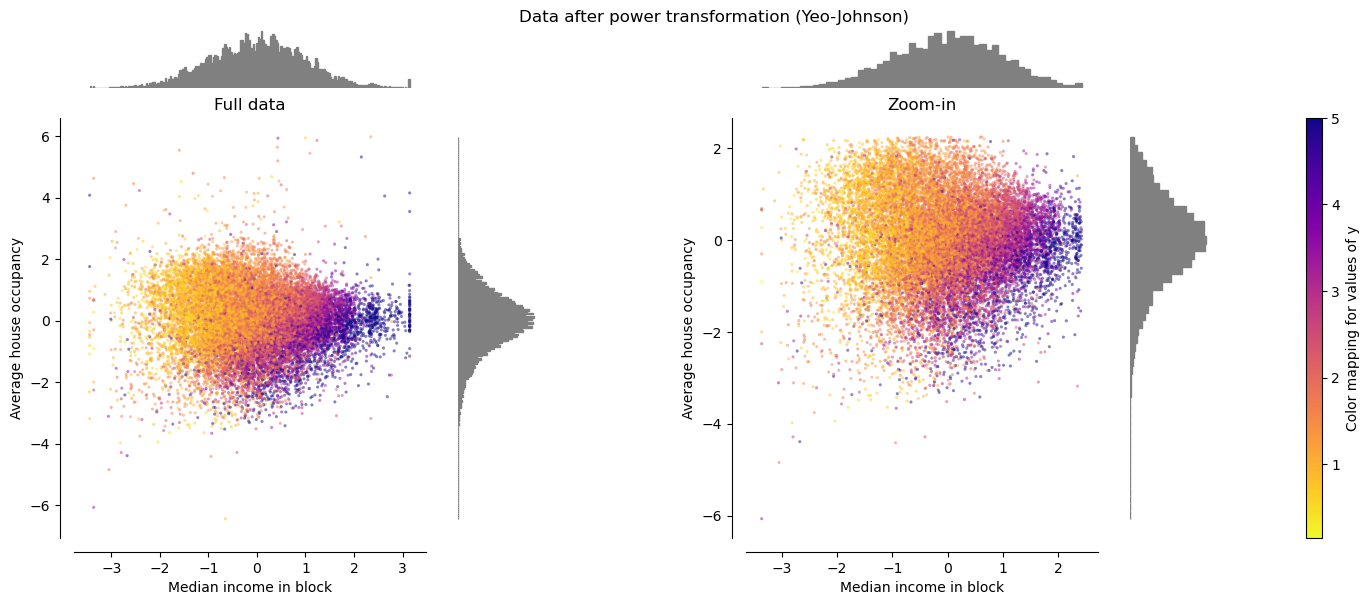

In [51]:
make_plot(0)